# Follow-Along Activity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)


In [2]:
from google.colab import files
upload = files.upload()

# Load data from CSV
data = pd.read_csv("13_logistic_regression.csv")
print(data.head())


Saving 13_logistic_regression.csv to 13_logistic_regression.csv
     Income  Credit Score  Default Status
0  67640.52        794.16               0
1  54001.57        632.61               1
2  59787.38        636.48               1
3  72408.93        748.47               0
4  68675.58        641.34               1


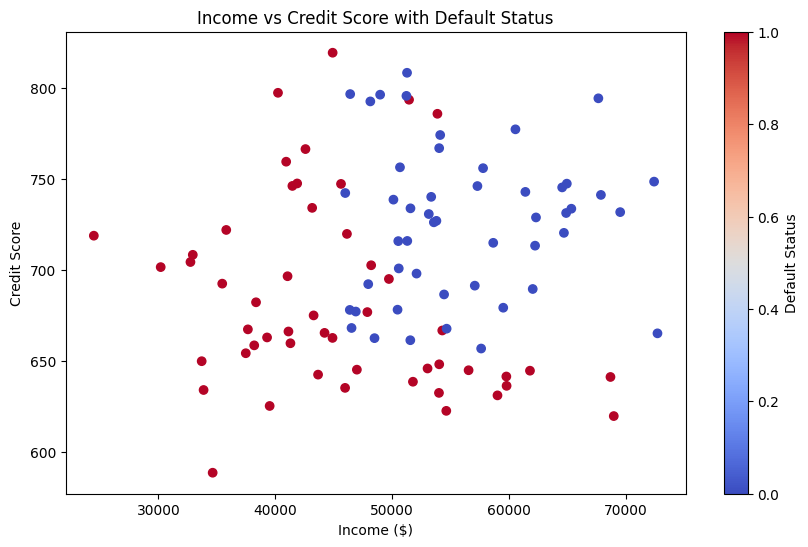

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Income'], data['Credit Score'], c=data['Default Status'], cmap='coolwarm', marker='o')
plt.xlabel('Income ($)')
plt.ylabel('Credit Score')
plt.title('Income vs Credit Score with Default Status')
plt.colorbar(label='Default Status')

# Save to jpeg for textbook publication
plt.savefig('Figure 13.10 Income vs Credit Score with Default Status.jpg', format='jpg', dpi=300)

plt.show()

In [6]:
# Define features and target
X = data[['Income', 'Credit Score']]
y = data['Default Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardise the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [7]:
# Predict default status on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of high risk (class 1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Display evaluation results
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")


Model Evaluation Metrics:
Accuracy: 0.70
Precision: 0.82
Recall: 0.69
F1 Score: 0.75
AUC: 0.81


In [8]:
new_data = pd.DataFrame({'Income': [48000], 'Credit Score': [670]})
new_data_scaled = scaler.transform(new_data)
predicted = model.predict(new_data_scaled)
print("Predicted Default Status for new data:", predicted)


Predicted Default Status for new data: [1]


# Your Project

Saving 13_logistic_regression_your_project.csv to 13_logistic_regression_your_project.csv
   gross_profit_margin  inventory_turnover  audit_risk
0                 0.40                7.80           0
1                 0.34                6.85           0
2                 0.41                5.12           0
3                 0.50                3.71           0
4                 0.33                6.40           0


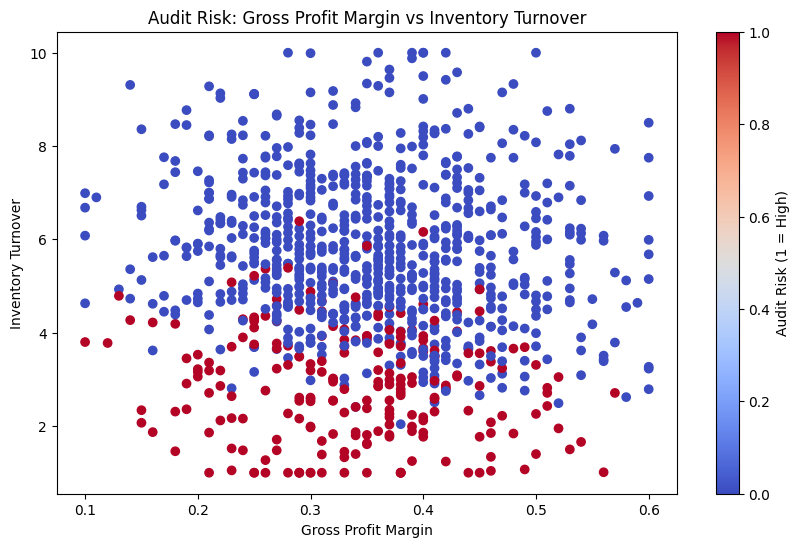


Model Evaluation Metrics:
Accuracy: 0.88
Precision: 0.78
Recall: 0.67
F1 Score: 0.72
AUC: 0.90

Predicted Audit Risk for New Client:
[0]


In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

# Load the dataset
from google.colab import files
upload = files.upload()
df = pd.read_csv("13_logistic_regression_your_project.csv")
print(df.head())

# Visualise the Data
plt.figure(figsize=(10, 6))
plt.scatter(
    df['gross_profit_margin'],
    df['inventory_turnover'],
    c=df['audit_risk'],
    cmap='coolwarm',
    marker='o'
)
plt.xlabel("Gross Profit Margin")
plt.ylabel("Inventory Turnover")
plt.title("Audit Risk: Gross Profit Margin vs Inventory Turnover")
plt.colorbar(label="Audit Risk (1 = High)")
plt.show()

# Train the Logistic Regression Model
X = df[['gross_profit_margin', 'inventory_turnover']]
y = df['audit_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate Model Performance
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (high risk)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")


# Make a Prediction for a New Client
new_data = pd.DataFrame({'gross_profit_margin': [0.25], 'inventory_turnover': [4.2]})
predicted_risk = model.predict(new_data)

print("\nPredicted Audit Risk for New Client:")
print(predicted_risk)  # 0 = Low Risk, 1 = High Risk
